# Capstone Project
## Overview

S&P500 index is a proxy for US market.It a barometer or a common indication of how US stock market is performing.It has 500 largest publicly traded company performance.
S&P500 is also a proxy for US market.It represent 80% of US stock market in which 30% revenue is coming internationally.
Read more about S&P500 :https://en.wikipedia.org/wiki/S%26P_500

### Goal:
My Goal is to study the impact of S&P500 index  on other stock indicators which represents unemployment,Oil rates,Gold rates,real estate, Russel-2000(small business).This is for educational purpose. 
This also show how you can use python in time-series trend analysis, data visualization using various libraries etc.



### The Data
Below is the Kaggle link where I have downloaded the CSV file of S&P500 and available till 21-july-2020.
https://www.kaggle.com/data/168739#938674

Visualizating the S&P 500 can also be done at yahoofinance using ticker ^GSPC but the download option is depreciated.
https://finance.yahoo.com/quote/%5EGSPC/


 **Import any libraries you think you will use:**

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
path_to_market_data = '/Users/renud/Desktop/Spring_Board/Unit_15_PYTHON/Capstone_2/'

<font color=blue><b>Load S&P 500 Historical Data</font>

In [4]:
sp500_df = pd.read_csv(path_to_market_data + '^GSPC.csv')
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [5]:
sp500_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000
23322,2020-11-04,3406.459961,3486.250000,3405.169922,3443.439941,3443.439941,4783040000


<font color=blue><b>Simple Visualization Using adjusted Close</font>

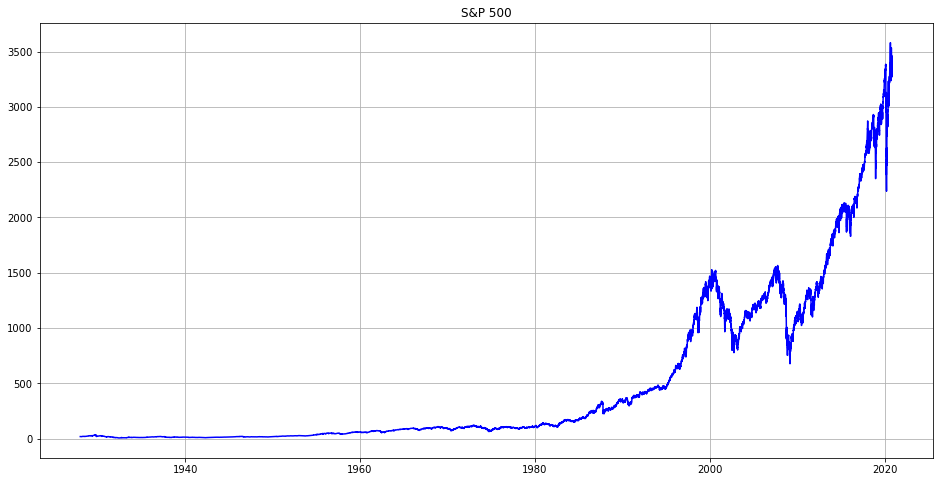

In [6]:
fig,ax=plt.subplots(figsize=(16,8))
plt.plot(sp500_df['Date'],sp500_df['Adj Close'],color='blue')
plt.title('S&P 500')
plt.grid()
plt.show()


From 1950 we have two market crashes, first one was dotcom bubble 2004 and second one was the great recession 2008. From 2010 we went roaring upwards till we hit pendamic. We could see a clear crash in 2019-2020.

<font color=blue><b>Simple Visualization using the Adjusted Close with Volume</font>

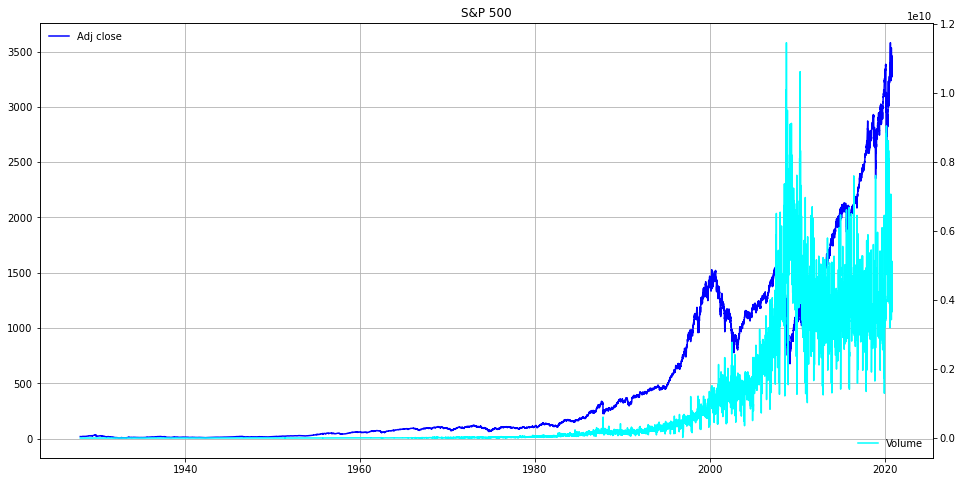

In [9]:
fig,ax=plt.subplots(figsize=(16,8))
plt.plot(sp500_df['Date'],sp500_df['Adj Close'],color='blue',label='Adj close')
ax.legend(loc='upper left', frameon=False)
plt.title('S&P 500')
plt.grid()


# Get Second Axis 
#  Means same date on x axis and  'Adj close' and 'volume' on two y-axis
ax2=ax.twinx()
plt.plot(sp500_df['Date'],sp500_df['Volume'],color='cyan',label='Volume')
ax2.legend(loc='lower right',frameon=False)

plt.show()


<font color=blue><b>Let's clean this up with a rolling average for 50 Periods we means and shows up the value</font>

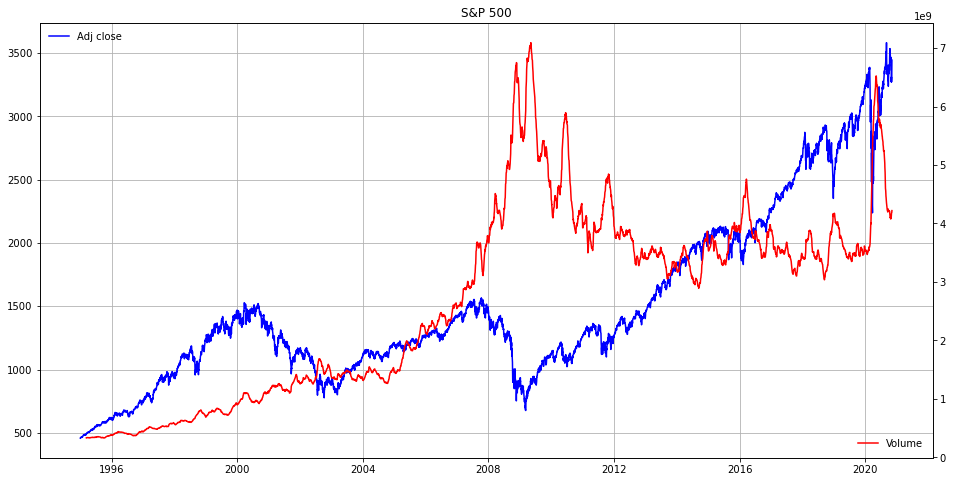

In [11]:
cut_off_date = '1995-01-01' 

sp500_df = sp500_df[sp500_df['Date'] >= cut_off_date]

fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(sp500_df['Date'], sp500_df['Adj Close'], color='blue',label='Adj close')
ax.legend(loc='upper left', frameon=False)
plt.title('S&P 500')
plt.grid()



# Get second axis
ax2 = ax.twinx()
plt.plot(sp500_df['Date'], 
         sp500_df['Volume'].rolling(window=50).mean().values, label='Volume', color='red')
ax2.legend(loc='lower right', frameon=False)

plt.show()

The Stock Price of SP500 is the same since 1995 , but the volume have now become smooth and easier to read.
At the time of great recession 2010 we could clearly see everybody paniced and showed great amount of participation.
AT 2016 it went again then it was stable and suddendly at 2020 when the COVID-19 pendamic hit again we see a panic in people and greate participation in stock market exchange activities.

<font color=blue><b>VIX - The Fear Index</font>

Dowmload the VIX (^VIX): https://finance.yahoo.com/quote/%5EVIX

Fear Index or Fear gauge 
One of the very importatnt indicator. Its a CBOE( Chicago Board Options Exchange) Volatility Index indicator, its a unique and powerful is used to forcast trouble in the stock market.If you want to know when the markets are hiting up and out at risk of crashing this is the indicator you should look at. This can help to decide on untimely purchase. If its super high thats the time you should watch out.
This is the derived product of S&P500 hence its related to it.And it measures of market volatility. So when the stock market price goes volatile, becomes eratic with large swings then normal, VIX price will go up.This indicator helps you looks out 30 days in future.
for more info : https://en.wikipedia.org/wiki/VIX

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

<font color=blue><b>Load The VIX and the S&P 500 Historical Data</font>

In [16]:
sp500_df = pd.read_csv('^GSPC.csv')
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [17]:
vix_df = pd.read_csv('^VIX.csv')
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
vix_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1,1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
2,1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
3,1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
4,1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [18]:
#Date Range Available:
print('VIX:',np.min(vix_df['Date']),np.max(vix_df['Date']))

#Date Range Available:
print('S&P500:',np.min(sp500_df['Date']),np.max(sp500_df['Date']))

VIX: 1990-01-02 00:00:00 2021-05-28 00:00:00
S&P500: 1927-12-30 00:00:00 2020-11-04 00:00:00


<font color=blue><b>Simple Visualization of VIX using the Adjusted Close</font>
    
<font color=blue><b>Anything above 15 you should pay attention. Anything below you can ignore</font>
    

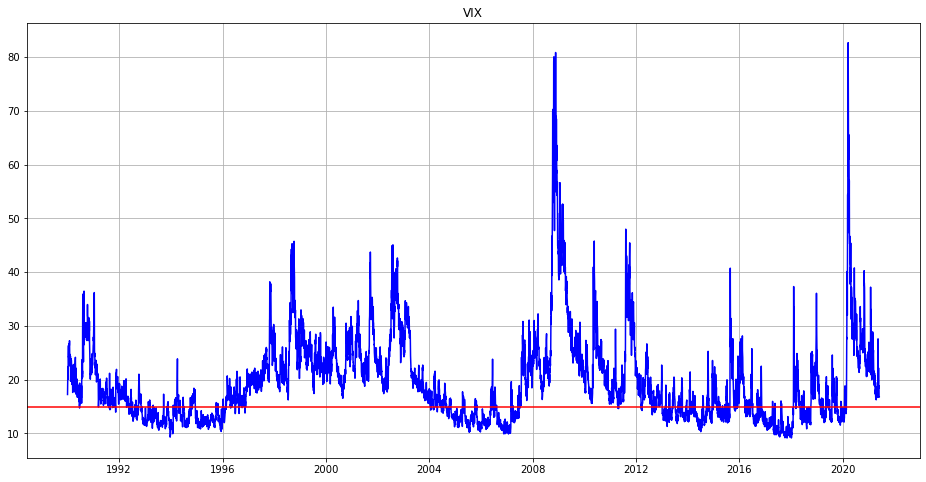

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(vix_df['Date'], vix_df['Adj Close'], color='blue')
plt.title('VIX')
plt.axhline(15, color='red')
plt.grid()
plt.show()

<font color=blue><b>Simple Visualization with the S&P 500</font>

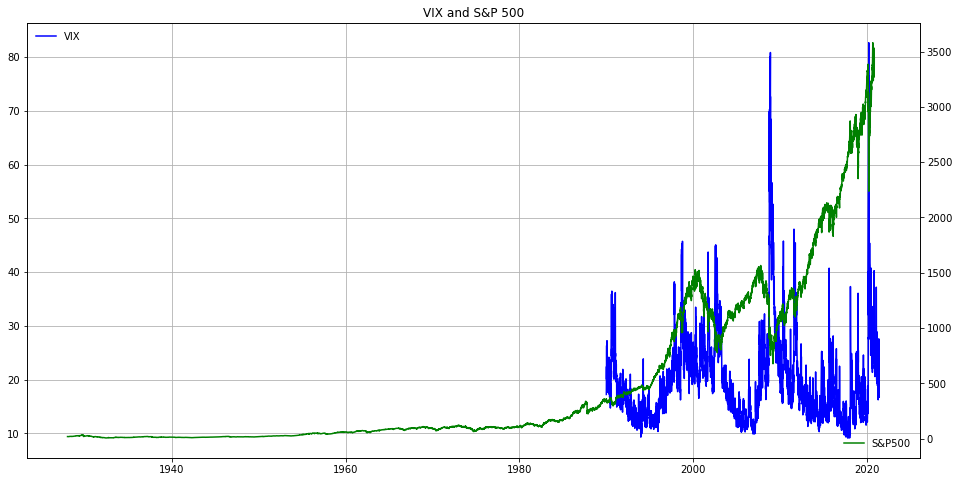

In [20]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(vix_df['Date'], vix_df['Adj Close'], color='blue', label='VIX')
ax.legend(loc='upper left', frameon=False)
plt.title('VIX and S&P 500')
plt.grid()

# Get second axis
ax2 = ax.twinx()
plt.plot(sp500_df['Date'], 
         sp500_df['Adj Close'], label='S&P500', color='green')
ax2.legend(loc='lower right', frameon=False)

plt.show()

<font color=blue><b>Let's clean this up with a rolling average</font>

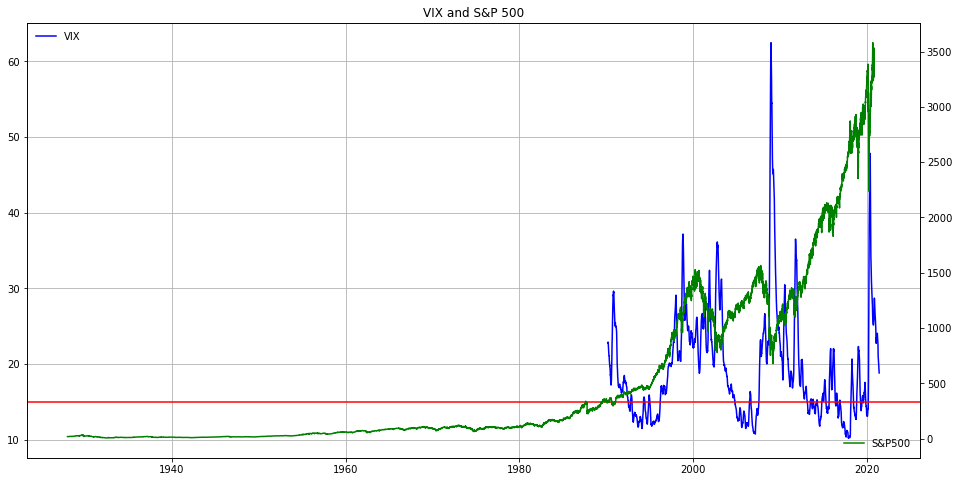

In [21]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(vix_df['Date'], vix_df['Adj Close'].rolling(window=50).mean().values, 
         color='blue', label='VIX')
ax.legend(loc='upper left', frameon=False)
plt.title('VIX and S&P 500')
plt.grid()
plt.axhline(15, color='red')


# Get second axis
ax2 = ax.twinx()
plt.plot(sp500_df['Date'], 
         sp500_df['Adj Close'], label='S&P500', color='green')
ax2.legend(loc='lower right', frameon=False)

plt.show()
 

When VIX value goes up it doesn't mean it the market will crash, But people get uncertain and started to get worry.So people judge whether we need sell or buy when there is VIX spike. But a corelation between the VIX spikeUp and stock market spikeDown can be seen clearly in greater recession and Covid-19 years.

<font color=blue><b>A Look at inflation</font>

CPI
Consumer Price Index:  is the way of measuring cost of living through time. Its a basket of food,energy, utility,basic products like clothing.

Case-Shiller U.S. National Home Price Index (CSUSHPINSA)
https://fred.stlouisfed.org/series/CSUSHPINSA

In [25]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [26]:
path_to_market_data = '/Users/renud/Desktop/Spring_Board/Unit_15_PYTHON/Capstone_2/'

<font color=blue><b>Load S&P 500 Historical Data</font>

In [28]:
spy_df = pd.read_csv(path_to_market_data + '^GSPC.csv')
spy_df['Date'] = pd.to_datetime(spy_df['Date'])
spy_df = spy_df[['Date', 'Adj Close', 'Volume']]
spy_df.columns = ['Date', 'SP500_Close', 'SP500_Volume']
print('spy_df:', np.min(spy_df['Date']), np.max(spy_df['Date']))
spy_df = spy_df.sort_values('Date')
spy_df['SP500_pct_change'] = spy_df['SP500_Close'].pct_change()
spy_df.head()

spy_df: 1927-12-30 00:00:00 2020-11-04 00:00:00


,Date,SP500_Close,SP500_Volume,SP500_pct_change
0,1927-12-30,17.660000,0,NaN
1,1928-01-03,17.760000,0,0.005663
2,1928-01-04,17.719999,0,-0.002252
3,1928-01-05,17.549999,0,-0.009594
4,1928-01-06,17.660000,0,0.006268


<font color=blue><b>Load Real Estate Data</font>

In [30]:
# Case-Shiller U.S. National Home Price Index (CSUSHPINSA)
# https://fred.stlouisfed.org/series/CSUSHPINSA

caseshill_df = pd.read_csv(path_to_market_data + 'CSUSHPINSA.csv')
caseshill_df['DATE'] = pd.to_datetime(caseshill_df['DATE'])
caseshill_df.columns = ['Date', 'Case-Shiller']
caseshill_df = caseshill_df.sort_values('Date')
print('caseshill_df:', np.min(caseshill_df['Date']), np.max(caseshill_df['Date']))
caseshill_df.head()

caseshill_df: 1987-01-01 00:00:00 2021-03-01 00:00:00


,Date,Case-Shiller
0,1987-01-01,63.735
1,1987-02-01,64.135
2,1987-03-01,64.471
3,1987-04-01,64.977
4,1987-05-01,65.552


In [31]:
print('spy_df.shape():',spy_df.shape)
print('caseshill_df.shape():',caseshill_df.shape)

spy_df.shape(): (23323, 4)
caseshill_df.shape(): (411, 2)


SP500 is one end of trading day data one for training day
CPI is one for per month.

In [32]:
# Housing - Vanguard Real Estate Index Fund ETF Shares (VNQ)
# https://finance.yahoo.com/quote/VNQ?p=VNQ
    
vnq_df = pd.read_csv(path_to_market_data + 'VNQ.csv')
vnq_df['Date'] = pd.to_datetime(vnq_df['Date'])
vnq_df = vnq_df[['Date', 'Adj Close', 'Volume']]
vnq_df.columns = ['Date', 'VNQ_Close', 'VNQ_Volume']
print('vnq_df:', np.min(vnq_df['Date']), np.max(vnq_df['Date']))
vnq_df = vnq_df.sort_values('Date')
vnq_df['VNQ_pct_change'] = vnq_df['VNQ_Close'].pct_change()
vnq_df.head()

vnq_df: 2004-09-29 00:00:00 2021-06-01 00:00:00


,Date,VNQ_Close,VNQ_Volume,VNQ_pct_change
0,2004-09-29,23.794544,205800,NaN
1,2004-09-30,23.985474,27900,0.008024
2,2004-10-01,24.429386,129800,0.018508
3,2004-10-04,24.534403,8100,0.004299
4,2004-10-05,24.529629,11900,-0.000195


In [33]:
# Green Street Commercial Property Price Index
# https://www.greenstreetadvisors.com/insights/CPPI

cppi_df = pd.read_csv(path_to_market_data + 'green_street_cppi.csv', sep='\t')
cppi_df['Date'] = pd.to_datetime(cppi_df['Date'])
cppi_df.columns = ['Date', 'CPPI_All_Property' , 'CPPI_Core_Sector']
cppi_df['CPPI_pct_change'] = cppi_df['CPPI_All_Property'].pct_change()
print('cppi_df:', np.min(cppi_df['Date']), np.max(cppi_df['Date']))
cppi_df.head()

cppi_df: 1997-12-01 00:00:00 2021-04-01 00:00:00


,Date,CPPI_All_Property,CPPI_Core_Sector,CPPI_pct_change
0,1997-12-01,47.8,48.4,NaN
1,1998-01-01,48.0,48.6,0.004184
2,1998-02-01,48.7,49.1,0.014583
3,1998-03-01,51.0,51.5,0.047228
4,1998-04-01,51.0,51.5,0.000000


<font color=blue><b>Plotting each against the S&P 500</font>

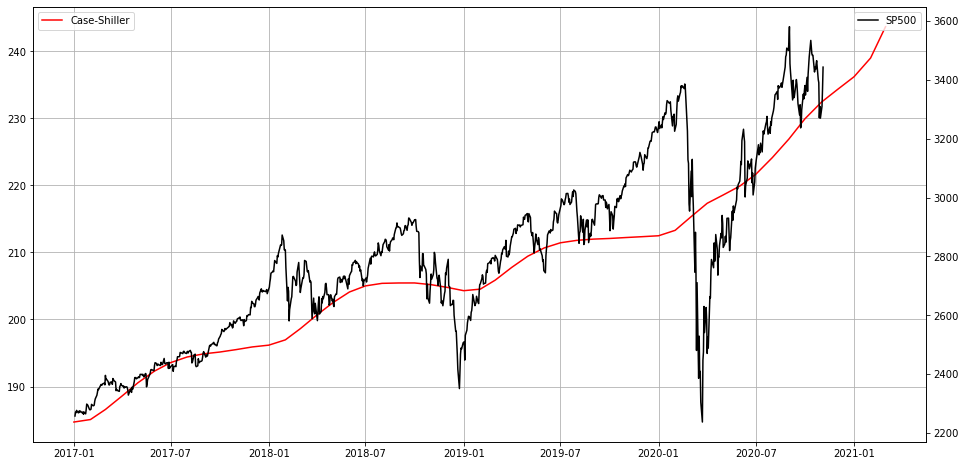

In [35]:
# cut off data for further analysis
cut_off_date = min(caseshill_df['Date'])
cut_off_date = '2017-01-01'

spy_df_tmp = spy_df.copy()
spy_df_tmp = spy_df_tmp[spy_df_tmp['Date'] >= cut_off_date]

caseshill_df_tmp = caseshill_df.copy()
caseshill_df_tmp = caseshill_df_tmp[caseshill_df_tmp['Date'] >= cut_off_date]

fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(caseshill_df_tmp['Date'], 
         caseshill_df_tmp['Case-Shiller'] , color='red', label='Case-Shiller')
 
plt.legend(loc='upper left')
plt.grid()

# Get second axis
ax2 = ax.twinx()
plt.plot(spy_df_tmp['Date'], 
         spy_df_tmp['SP500_Close'] , color='black', label='SP500')
plt.legend(loc='upper right')


It includes repeat sales of houses. Not new sales. A house has to be sold twice in order to remove chaos.
AT dotcom bubble crash, the cash-sheller dint budge much. It was uneffected.The prices though started crashing before the the great recession started to hit.
At covid-19 crash little effect it had and it is still roaring up.The market is still going up its Bullish.

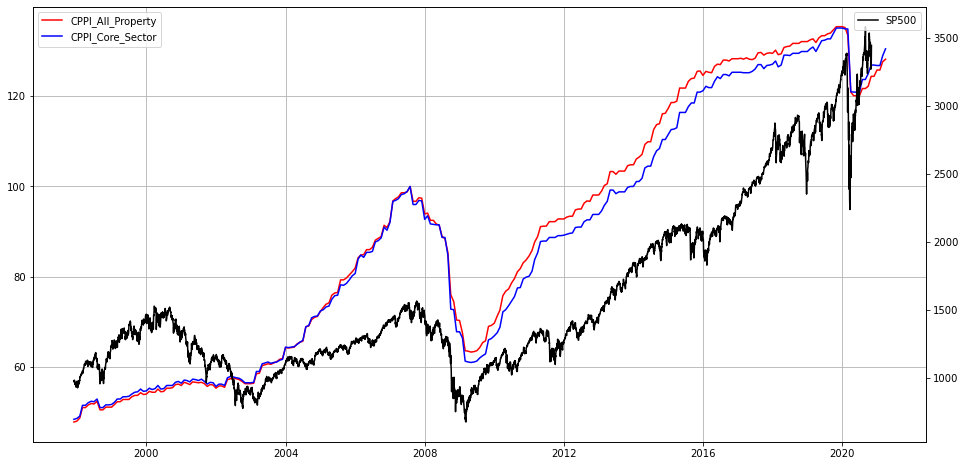

In [36]:
# cut off data for further analysis
cut_off_date = min(cppi_df['Date'])
spy_df_tmp = spy_df.copy()
spy_df_tmp = spy_df_tmp[spy_df_tmp['Date'] >= cut_off_date]
 

fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(cppi_df['Date'], 
         cppi_df['CPPI_All_Property'] , color='red', label='CPPI_All_Property')
plt.plot(cppi_df['Date'], 
         cppi_df['CPPI_Core_Sector'] , color='blue', label='CPPI_Core_Sector')
  
plt.legend(loc='upper left')
plt.grid()
 
# Get second axis
ax2 = ax.twinx()
plt.plot(spy_df_tmp['Date'], 
         spy_df_tmp['SP500_Close'] , color='black', label='SP500')
plt.legend(loc='upper right')

This indicator trades on daily basis. So if you want to have a check where is the real estate today this is the indicator.
Its interesting to note that VNQ is tailing very closely with S&P500 data.So after 2016 crash markets were going up without any issue but it crashed after covid-19 hit.It little bit slowed down but trying to progress.


All Property CPPI weights: retail (20%), office (17.5%), apartment (15%), health care (15%), industrial (10%), lodging (7.5%), net lease (5%), self-storage (5%), manufactured home park (2.5%), and student housing (2.5%). Retail is mall (50%) and strip retail (50%).

Core Sector CPPI weights: apartment (25%), industrial (25%), office (25%), and retail (25%




We see that before 2010 the real sector prices are going sky rocket. After the great recession it kind of slow down from 2009 to 2015.
And the biggest next crash is covid-19 , where again the real estate sector crashes down slightly, Its picking it up.

<font color=blue><b>impact Oil vs Gold Decoupling with repect to S&P500</font>

Oil vs Gold Decoupling

Crude Oil Prices: West Texas Intermediate (WTI) https://fred.stlouisfed.org/series/DCOILWTICO

Gold Price: London Fixing https://www.quandl.com/data/LBMA/GOLD-Gold-Price-London-Fixing

And the S&P500 index (^GSPC) https://finance.yahoo.com/quote/%5EGSPC/

In [40]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
mpl.style.use('default')

import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

C:\Users\renud\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [41]:
path_to_market_data = '/Users/renud/Desktop/Spring_Board/Unit_15_PYTHON/Capstone_2/'

In [42]:
# S&P Load:
sp500_df = pd.read_csv(path_to_market_data + '^GSPC.csv')
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df = sp500_df[['Date', 'Adj Close']]
sp500_df.columns = ['Date', 'SP500_close']
sp500_df['SP500_pct_change'] = sp500_df['SP500_close'].pct_change()
sp500_df.tail()


,Date,SP500_close,SP500_pct_change
23318,2020-10-29,3310.110107,0.011947
23319,2020-10-30,3269.959961,-0.012130
23320,2020-11-02,3310.239990,0.012318
23321,2020-11-03,3369.159912,0.017799
23322,2020-11-04,3443.439941,0.022047


In [43]:
# https://www.quandl.com/data/LBMA/GOLD-Gold-Price-London-Fixing
gold_df = pd.read_csv(path_to_market_data + 'LBMA-GOLD.csv')
gold_df['Date'] = pd.to_datetime(gold_df['Date'])

gold_df = gold_df[['Date', 'USD (PM)']]
gold_df.columns = ['Date', 'GLD']
gold_df = gold_df.iloc[::-1]
gold_df['GLD'] = pd.to_numeric(gold_df['GLD'], errors='coerce')
gold_df['GLD_pct_change'] = gold_df['GLD'].pct_change()

gold_df.tail()

,Date,GLD,GLD_pct_change
4,2021-05-26,1899.75,0.006757
3,2021-05-27,1891.45,-0.004369
2,2021-05-28,1899.95,0.004494
1,2021-06-01,1899.35,-0.000316
0,2021-06-02,1902.75,0.001790


In [44]:
#https://fred.stlouisfed.org/series/DCOILWTICO
oil_df = pd.read_csv(path_to_market_data + 'DCOILWTICO.csv')
oil_df['Date'] = pd.to_datetime(oil_df['DATE'])
 
oil_df = oil_df[['Date', 'DCOILWTICO']]
oil_df.columns = ['Date', 'OIL']
oil_df['OIL'] = pd.to_numeric(oil_df['OIL'], errors='coerce')
oil_df['OIL_pct_change'] = oil_df['OIL'].pct_change()
oil_df.head()

,Date,OIL,OIL_pct_change
0,1986-01-02,25.56,NaN
1,1986-01-03,26.00,0.017214
2,1986-01-06,26.53,0.020385
3,1986-01-07,25.85,-0.025631
4,1986-01-08,25.87,0.000774


In [45]:
np.min(oil_df['Date'])

Timestamp('1986-01-02 00:00:00')

In [46]:
np.min(gold_df['Date'])

Timestamp('1968-01-02 00:00:00')

Text(0.5, 1.0, 'OIL VS GLD')

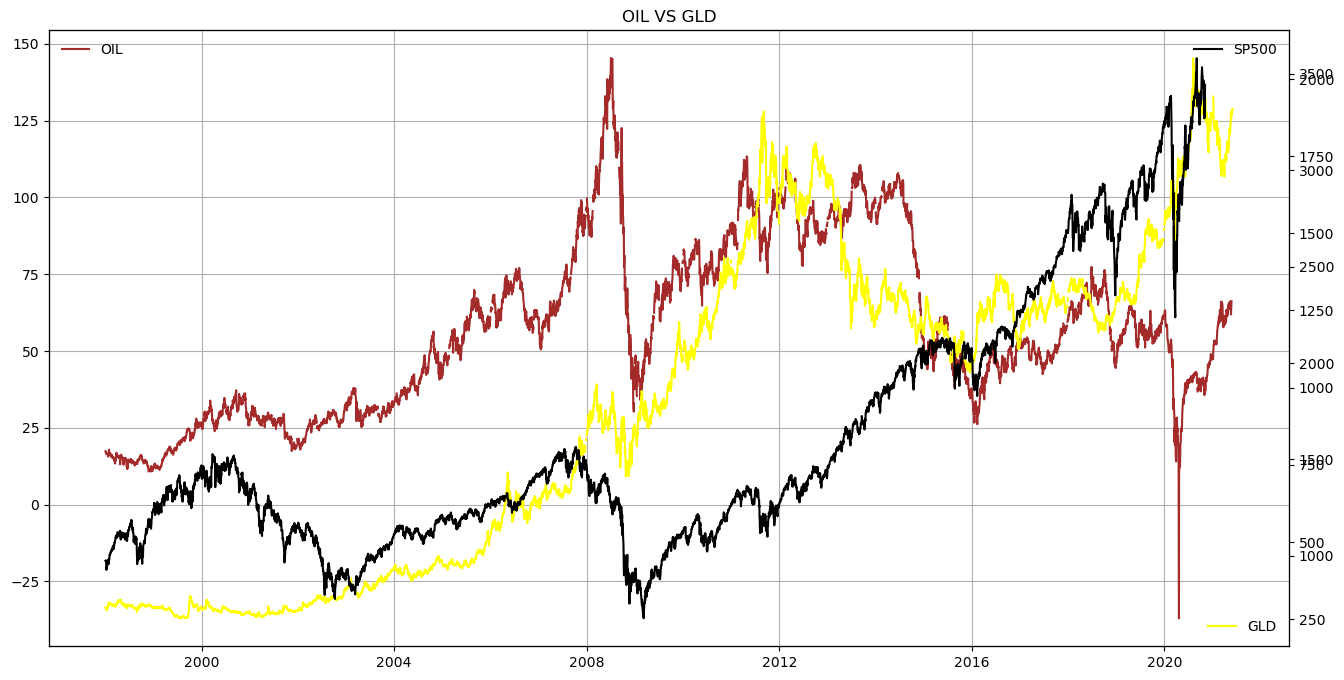

In [47]:
 
# cut off data for visualization 
cut_off_date = '1998-01-01'
gold_df = gold_df[gold_df['Date'] >= cut_off_date]
oil_df = oil_df[oil_df['Date'] >= cut_off_date]
sp500_df = sp500_df[sp500_df['Date'] >= cut_off_date]

# join both datasets together
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(oil_df['Date'], oil_df['OIL'] , color='brown', label='OIL')
ax.legend(loc='upper left',frameon=False)
plt.grid()
 

# Get second axis
ax2 = ax.twinx()
plt.plot(gold_df['Date'], 
         gold_df['GLD'] , color='yellow', label='GLD')
ax2.legend(loc='lower right',frameon=False)
 

# Get second axis
ax3 = ax.twinx()
plt.plot(sp500_df['Date'], 
         sp500_df['SP500_close']
         , color='black', label='SP500')
ax3.legend(loc='upper right',frameon=False)

plt.title('OIL VS GLD')

<font color=blue><b>Let's do the corelation on gold and oil to better understand the relationship</font>

In [48]:
# Lets join the dataFrame:

together = pd.merge(gold_df, oil_df, on= ['Date'], how='inner')

#Last valid observation farward
together=together.fillna(method='ffill')

#drop NA's
together=together.dropna(axis=0)
together.tail()

# CORR
# rolling for smothing.
together['corr']=together['GLD'].rolling(200).corr(together['OIL'].rolling(200))
together['corr']=together['corr'].rolling(10).mean()

together.tail()

,Date,GLD,GLD_pct_change,OIL,OIL_pct_change,corr
5906,2021-05-18,1866.75,0.007040,65.49,-0.011322,-0.813023
5907,2021-05-19,1888.45,0.011624,63.28,-0.033746,-0.808480
5908,2021-05-20,1878.30,-0.005375,61.95,-0.021018,-0.803384
5909,2021-05-21,1875.90,-0.001278,63.61,0.026796,-0.798286
5910,2021-05-24,1880.15,0.002266,66.13,0.039616,-0.793194


We see a good negative correlation. 

<font color=blue><b>UnEmployment Indexes study with respect to S&P500 </font>

Let's Compare overlay the Unemployment Rates on the S&P500 with python. Now let's take into the unemployment numbers.

You can find the unemployment rates directly from the Bureau of Labor Statistics:

https://data.bls.gov/timeseries/lns14000000

Civilian Labor Force Participation Rate:

https://fred.stlouisfed.org/series/CIVPART

https://fred.stlouisfed.org/categories/12

In [50]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [51]:
path_to_market_data = '/Users/renud/Desktop/Spring_Board/Unit_15_PYTHON/Capstone_2/'

In [52]:
# get the SP500 (^GSPC) from Yahoo Finace
sp500_df = pd.read_csv(path_to_market_data + '^GSPC.csv')
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df = sp500_df[['Date', 'Adj Close']]
sp500_df.columns = ['Date', 'SP500_close']
sp500_df['SP500_pct_change'] = sp500_df['SP500_close'].pct_change()
sp500_df.head()

,Date,SP500_close,SP500_pct_change
0,1927-12-30,17.660000,NaN
1,1928-01-03,17.760000,0.005663
2,1928-01-04,17.719999,-0.002252
3,1928-01-05,17.549999,-0.009594
4,1928-01-06,17.660000,0.006268


In [53]:
# loading employment data

# https://data.bls.gov/timeseries/lns14000000
unemployment_df = pd.read_csv(path_to_market_data + 'labor-force-bureau-of-labor-statistics-full.csv',sep='\t')
unemployment_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
1,1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
2,1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3
3,1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1
4,1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7


In [54]:
def monthToNum(shortMonth):
    return{'Jan' : 1,
            'Feb' : 2,
            'Mar' : 3,
            'Apr' : 4,
            'May' : 5,
            'Jun' : 6,
            'Jul' : 7,
            'Aug' : 8,
            'Sep' : 9, 
            'Oct' : 10,
            'Nov' : 11,
            'Dec' : 12
    }[shortMonth]

monthToNum('Jan')

1

In [55]:
# stack the data together to have on row per month
unemployment_df = (unemployment_df.set_index(['Year'])
       .stack().reset_index(name='Unemployment')
                             .rename(columns={'level_1':'Month' }))
       
 
unemployment_df['Month']=[monthToNum(m) for m in unemployment_df['Month'].values]

In [56]:
unemployment_df

,Year,Month,Unemployment
0,1948,1,3.4
1,1948,2,3.8
2,1948,3,4
3,1948,4,3.9
4,1948,5,3.5
...,...,...,...
883,2021,8,
884,2021,9,
885,2021,10,
886,2021,11,


In [57]:
# format the year and the month into an actual date
unemployment_df['Date'] = [str(y) + '-' + str(m) + '-' + '01' for y,m in zip(unemployment_df['Year'].values, unemployment_df['Month'].values)]
unemployment_df = unemployment_df[['Date','Unemployment']]
unemployment_df['Unemployment'] = pd.to_numeric(unemployment_df['Unemployment'], errors='coerce')
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'])
unemployment_df = unemployment_df.sort_values('Date')
unemployment_df['Unemployment_pct_change'] = unemployment_df['Unemployment'].pct_change()

In [58]:
unemployment_df

,Date,Unemployment,Unemployment_pct_change
0,1948-01-01,3.4,NaN
1,1948-02-01,3.8,0.117647
2,1948-03-01,4.0,0.052632
3,1948-04-01,3.9,-0.025000
4,1948-05-01,3.5,-0.102564
...,...,...,...
883,2021-08-01,NaN,0.000000
884,2021-09-01,NaN,0.000000
885,2021-10-01,NaN,0.000000
886,2021-11-01,NaN,0.000000


<font color=blue><b>Plotting each against the S&P 500 and Labor trends</font>

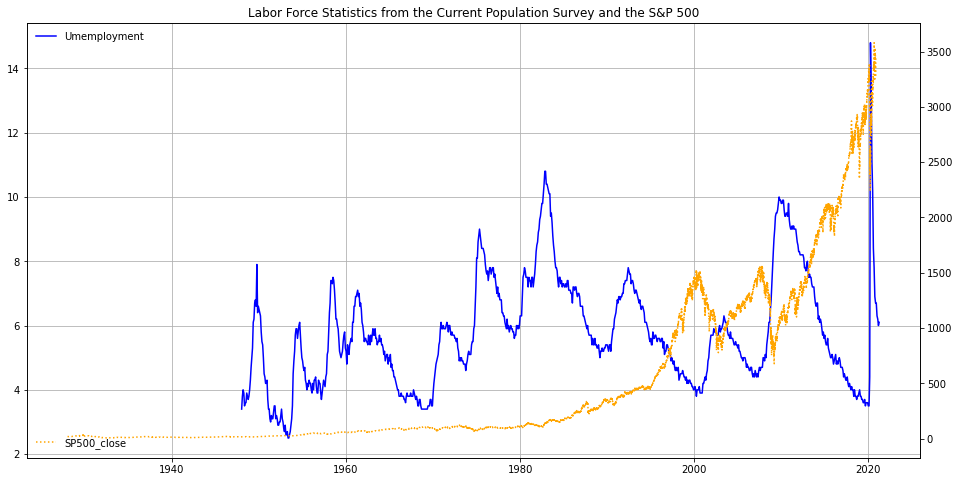

In [60]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(unemployment_df['Date'], unemployment_df['Unemployment'], color='blue',label='Umemployment')
ax.legend(loc='upper left',frameon=False)
plt.grid()
plt.title('Labor Force Statistics from the Current Population Survey and the S&P 500')

# add second axis
ax2 = ax.twinx()
plt.plot(sp500_df['Date'], 
         sp500_df['SP500_close'], color='orange', label='SP500_close', linestyle= 'dotted')
 
ax2.legend(loc='lower left', frameon=False)
plt.show()

Clearly we see a reverse relationship, mirror image between unemployment(blue )and SP500(orange).
We see 2000 market crash, where unemployement risedup. The greatest recession crash at 2008. And also the Covid-19 effect crash where we actually see the worst unemployement in the history.Its slowly getting better.

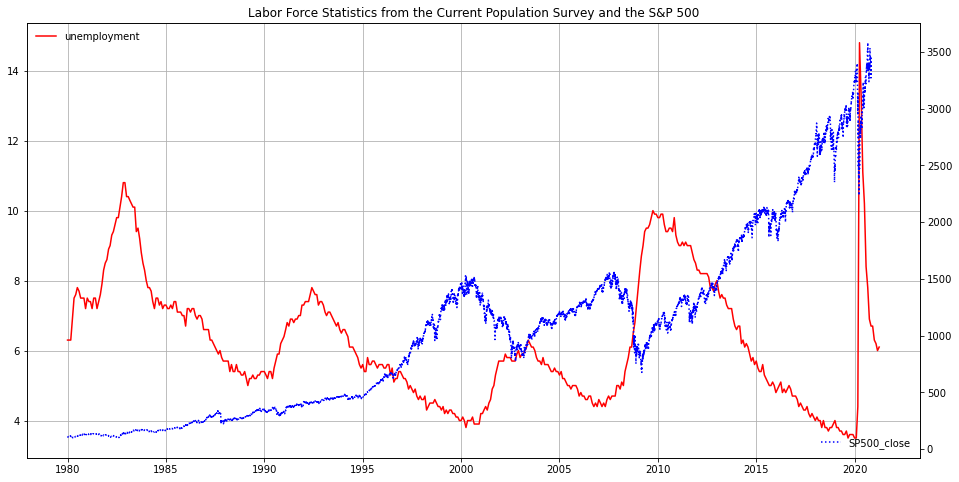

In [61]:
# cut off data for further analysis
cut_off_date = '1980-01-01'
unemployment_df = unemployment_df[unemployment_df['Date'] >= cut_off_date]
sp500_df = sp500_df[sp500_df['Date'] >= cut_off_date]
 
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(unemployment_df['Date'], unemployment_df['Unemployment'], color='red',label='unemployment')
ax.legend(loc='upper left',frameon=False)
plt.grid()
plt.title('Labor Force Statistics from the Current Population Survey and the S&P 500')

# add second axis
ax2 = ax.twinx()
plt.plot(sp500_df['Date'], 
         sp500_df['SP500_close'], color='blue', label='SP500_close', linestyle= 'dotted')
 
ax2.legend(loc='lower right', frameon=False)
plt.show()

Same chart we are Zooming in.We hit new highs on unemployments and doing better.

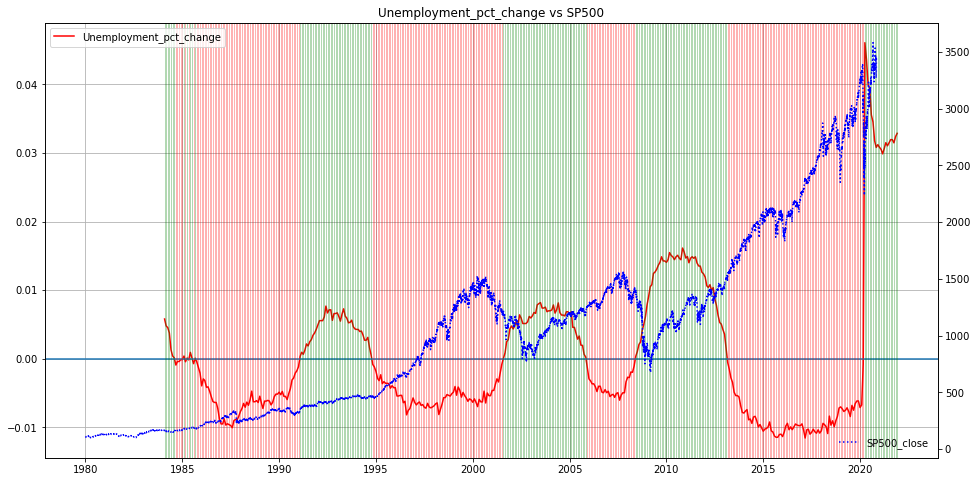

In [62]:
unemployment_df['Diff'] = unemployment_df['Unemployment_pct_change']
unemployment_df['Diff'] = unemployment_df['Diff'].rolling(window=50).mean().values 

fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(unemployment_df['Date'], 
         unemployment_df['Diff'],
         color='red', label='Unemployment_pct_change')
plt.axhline(0)
plt.title('Unemployment_pct_change vs SP500')
plt.legend()
plt.grid()




# background colors
unemployment_df['i'] = range(1,len(unemployment_df)+1)

# track whenever the percentage change is above or b
pos_1 = unemployment_df[unemployment_df['Diff'] >= 0]['i'] 
neg_1 = unemployment_df[unemployment_df['Diff'] < 0]['i']

for x in pos_1:
    ax.axvline(unemployment_df[unemployment_df['i']==x]['Date'].values, color='green',linewidth=1,alpha=0.3)
for x in neg_1:
     ax.axvline(unemployment_df[unemployment_df['i']==x]['Date'].values, color='red',linewidth=1,alpha=0.3)

# add second axis
ax2 = ax.twinx()
plt.plot(sp500_df['Date'], 
         sp500_df['SP500_close'], color='blue', label='SP500_close', linestyle= 'dotted')
 
ax2.legend(loc='lower right', frameon=False)
plt.show()

The labor force participation rate is a measure of an economy’s active workforce.
Note that as a result of the COVID-19 pandemic the labor force participation rate initially fell markedly in early 2020 from the 63% level to 61.5% level as indicated on website. The pandemic’s effect on the US economy ended up discouraging workers from seeking employment in early 2020 as many businesses shutdown and high levels of unemployment.

In [63]:
# https://fred.stlouisfed.org/series/CIVPART
labor_df = pd.read_csv(path_to_market_data + 'CIVPART.csv')
labor_df.columns = ['Date', 'Labor_Participation']
labor_df['Date'] = pd.to_datetime(labor_df['Date'])
labor_df['Labor_Participation_pct_change'] = labor_df['Labor_Participation'].pct_change()
labor_df.head()

,Date,Labor_Participation,Labor_Participation_pct_change
0,1948-01-01,58.6,NaN
1,1948-02-01,58.9,0.005119
2,1948-03-01,58.5,-0.006791
3,1948-04-01,59.0,0.008547
4,1948-05-01,58.3,-0.011864


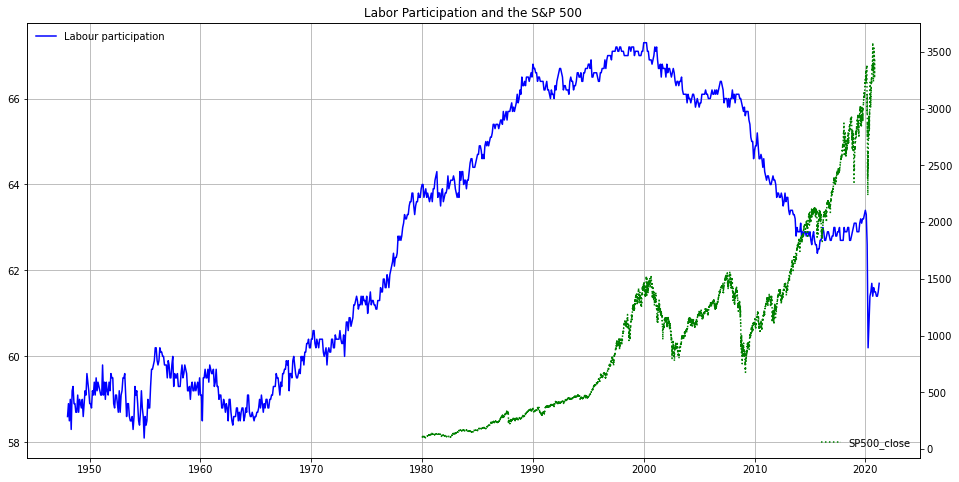

In [64]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(labor_df['Date'], labor_df['Labor_Participation'], color='blue',label='Labour participation')
ax.legend(loc='upper left',frameon=False)
plt.grid()
plt.title('Labor Participation and the S&P 500')

# add second axis
ax2 = ax.twinx()
plt.plot(sp500_df['Date'], 
         sp500_df['SP500_close'], color='green', label='SP500_close', linestyle= 'dotted')
 
ax2.legend(loc='lower right', frameon=False)
plt.show()

<font color=green><b>All Together NOW!!</font>

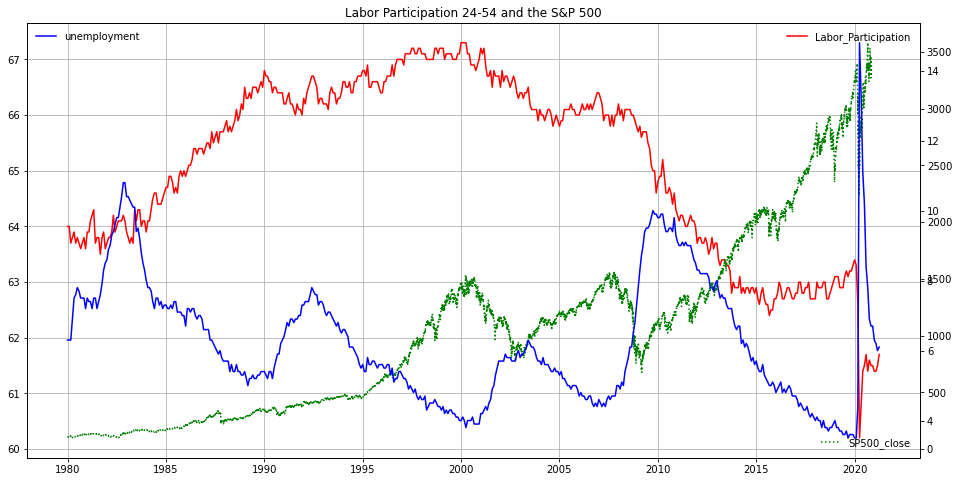

In [65]:
cut_off_date = '1980-01-01'
labor_df = labor_df[labor_df['Date'] >= cut_off_date]

fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(labor_df['Date'], labor_df['Labor_Participation'], color='red', 
         label='Labor_Participation')
ax.legend(loc='upper right',frameon=False)
plt.grid()
plt.title('Labor Participation 24-54 and the S&P 500')

# add second axis
ax2 = ax.twinx()
plt.plot(sp500_df['Date'], 
         sp500_df['SP500_close'], color='green', label='SP500_close', linestyle= 'dotted')
ax2.legend(loc='lower right',frameon=False)

# add third axis
ax3 = ax.twinx()
plt.plot(unemployment_df['Date'], 
         unemployment_df['Unemployment'], color='blue', label='unemployment')
 
ax3.legend(loc='upper left', frameon=False)
plt.show()